In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Part-1: Data Exploration and Pre-processing

1)load the given dataset

In [2]:
df=pd.read_csv('Python_Project_4_Log.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2)print all the column names

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3)describe the data

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4)check the null value 

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

5)if there are Null values,Handle these

The missing values from the column Age is replaced by the mean age and the missing values from Cabin and Embarked is replaced by mode of those columns

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:
df["Age"].mean()

29.699117647058763

In [28]:
df['Cabin'].fillna(value=df.Cabin.mode().iloc[0],inplace=True)

In [13]:
df['Cabin'].mode()

0    B96 B98
1         G6
dtype: object

In [30]:
df['Embarked'].fillna(value=df.Embarked.mode().iloc[0],inplace=True)

In [15]:
df['Embarked'].mode()

0    S
dtype: object

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Part-2: Working with Models 

1)Create the target data and feature data where target data is survived

In [52]:
X = df.drop(['Survived','Name','Ticket'],axis=1)
Y = df.Survived

2)Split the data into Training and testing Set 

Lets first apply label encoding to the categorical data

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
coder=LabelEncoder()

In [54]:
X['Sex'] = coder.fit_transform(X['Sex'])

In [56]:
X['Cabin'] = coder.fit_transform(X['Cabin'])

In [58]:
X['Embarked'] = coder.fit_transform(X['Embarked'])

In [61]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,47,2
1,2,1,0,38.0,1,0,71.2833,81,0
2,3,3,0,26.0,0,0,7.9250,145,2
3,4,1,0,35.0,1,0,53.1000,55,2
4,5,3,1,35.0,0,0,8.0500,47,2


In [63]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Now lets split the data

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

3)Create a Logisticregression model for Target and feature data

In [46]:
from sklearn.linear_model import LogisticRegression

In [69]:
lreg=LogisticRegression()

In [70]:
lreg.fit(X_train,Y_train)

C:\Users\dhava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
lreg.score(X_test,Y_test)

0.8044692737430168

4)Display the Confusion Matrix

In [74]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [75]:
predicted=lreg.predict(X_test)

In [76]:

confusion_matrix(Y_test,predicted)

array([[93, 23],
       [12, 51]], dtype=int64)

5)Find the Accuracy Score 

In [78]:
accuracy_score(predicted,Y_test)

0.8044692737430168

6)Find the Precision Score 

In [80]:
precision_score(predicted,Y_test)

0.8095238095238095

7)Find the Recall Score 

In [81]:
recall_score(predicted,Y_test)

0.6891891891891891

8)Find the F1 Score 

In [82]:
f1_score(predicted,Y_test)

0.7445255474452555

9)Find the probability of testing data 

In [83]:
proby = lreg.predict_proba(X_test)

In [84]:
proby

array([[0.90434153, 0.09565847],
       [0.90362391, 0.09637609],
       [0.84668283, 0.15331717],
       [0.93944354, 0.06055646],
       [0.29103801, 0.70896199],
       [0.85516238, 0.14483762],
       [0.22949674, 0.77050326],
       [0.49228235, 0.50771765],
       [0.81085151, 0.18914849],
       [0.65195315, 0.34804685],
       [0.86243345, 0.13756655],
       [0.31210321, 0.68789679],
       [0.83245807, 0.16754193],
       [0.1517249 , 0.8482751 ],
       [0.86695913, 0.13304087],
       [0.70923429, 0.29076571],
       [0.6616975 , 0.3383025 ],
       [0.89344502, 0.10655498],
       [0.89794399, 0.10205601],
       [0.879274  , 0.120726  ],
       [0.84565237, 0.15434763],
       [0.4735283 , 0.5264717 ],
       [0.49901479, 0.50098521],
       [0.08170019, 0.91829981],
       [0.884593  , 0.115407  ],
       [0.30717798, 0.69282202],
       [0.86744737, 0.13255263],
       [0.82526567, 0.17473433],
       [0.34150509, 0.65849491],
       [0.84631255, 0.15368745],
       [0.

10)Display ROC Curve and find the AUC score 

In [85]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

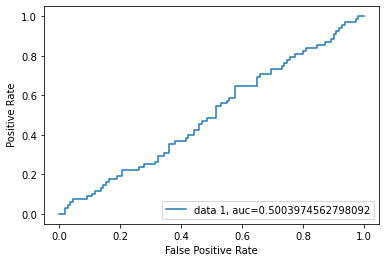

In [86]:
y_pred_proba = lreg.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()